<a href="https://colab.research.google.com/github/Jianhong-Guo/JSC270_Assg2/blob/assignment2/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

Double-click (or enter) to edit

###Importing data

In [143]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [144]:
income94.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [145]:
# 1a
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [146]:
income94.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [147]:
income94.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [148]:
income94.marital_status.value_counts()


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [149]:
income94.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [150]:
income94.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [151]:
income94.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [152]:
income94.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [153]:
income94.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [154]:
income94.gross_income_group.value_counts()

 <=50K    24720
 >50K      7841
Name: gross_income_group, dtype: int64

Answer for 1: According to all of the above, we can know that the data types are as expected.

Answer for q2: The missing values represent as "?" mark as shown above. 

In [155]:
#q2. We replace all the '?' value in the dateframe with np.nan.
income94 = income94.replace(' ?', np.nan)
#The number of missing values in each column show as following.
income94.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

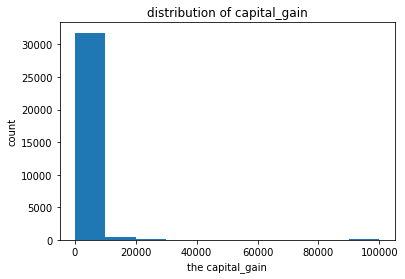

In [156]:
# Q3. The distribution of captital_gain
plt.hist(income94.capital_gain) 
plt.title("distribution of capital_gain")
plt.xlabel("the capital_gain")
plt.ylabel("count")
plt.show()

The capital_gain variable should be transformed since the histogram is clumped in one bin, so we need to make it distributed more widely for better interpretation. Then we can know better about capital_gain. I use a log scale function to transform the capital_gain. Since the capital_gain has value 0, and we may not care 0. In order to use the log scale function, I only work with values greater than 0.

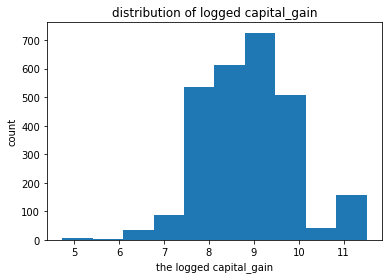

In [157]:
#the logged distribution of captital_gain
gain_no_zero = income94[income94['capital_gain']>0]
plt.hist(np.log(gain_no_zero.capital_gain))
plt.title("distribution of logged capital_gain")
plt.xlabel("the logged capital_gain")
plt.ylabel("count")
plt.show()

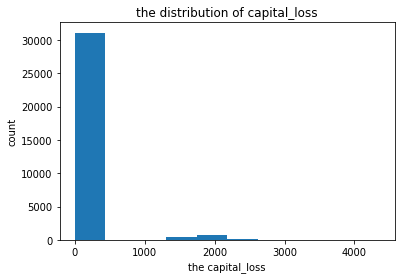

In [158]:
# the distribution of captital_loss
plt.hist(income94.capital_loss) 
plt.title("the distribution of capital_loss")
plt.xlabel("the capital_loss")
plt.ylabel("count")
plt.show()

Similary, The capital_loss variable should be transformed since the histogram is clumped in one bin, so we need to make it distributed more widely. I use a log scale function to transform the capital_loss. Since the capital_loss has value 0, and we may not care 0, in order to use the log scale function, I only work with values greater than 0.

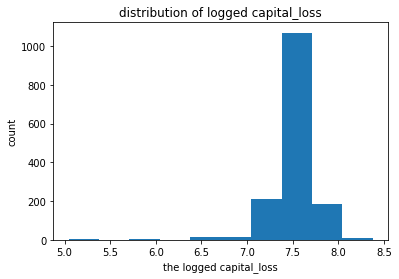

In [159]:
#the logged distribution of captital_loss
loss_no_zero = income94[income94['capital_loss']>0]
plt.hist(np.log(loss_no_zero.capital_loss))
plt.title("distribution of logged capital_loss")
plt.xlabel("the logged capital_loss")
plt.ylabel("count")
plt.show()

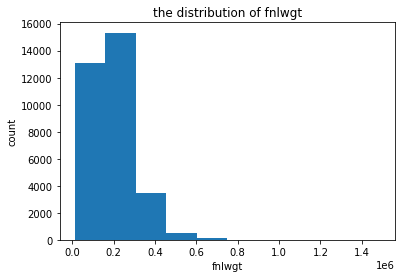

In [160]:
#Q4. the distribution of fnlwgt
plt.hist(income94.fnlwgt) 
plt.title("the distribution of fnlwgt")
plt.xlabel("fnlwgt")
plt.ylabel("count")
plt.show()

Answer for q4: The data is not symmetrically distributed, and the histogram has heavy left side.

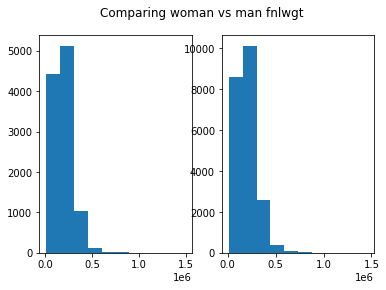

In [161]:
# compare female and male fnlwgt
fig, (plt1, plt2) = plt.subplots(1, 2)
fig.suptitle('Comparing woman vs man fnlwgt')
women_fnlwgt = income94[income94['sex']==' Female' ]
man_fnlwgt = income94[income94['sex'] == ' Male']
plt1.hist(women_fnlwgt.fnlwgt) 
plt2.hist(man_fnlwgt.fnlwgt)
fig.show()

Q4: Compare the histograms of fnlwgt for woman(left) and man, the overall trend of both histograms are pretty similar, and almost all of the data for both histograms are between 0 and 1000000, only a few data higher than 1000000. They are left heavy and have long right tails. Also, they all have the highest bin around 250000, and the second highest bin around 75000. The count of the highest bin and second highest bin are pretty close, and the count of the rest bins are far away from those two.

In [162]:
# set all the fnlwgt greater than 1000000 to be outliers, and there are only 13 of them.
outliers =income94[income94.fnlwgt>1000000]
income94['fnlwgt'].loc[outliers.index] = np.nan
income94.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


age                      0
workclass             1836
fnlwgt                  13
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

##Correlation

In [163]:
# q1 .show the correlations between age, education_num, and hours_per_week
newdf = income94[['age', 'education_num', 'hours_per_week']]
newdf.corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


1a. Since all the correlations are small, and the highest one is 0.148 between hours_per_week and education_num, so I think the variables are correlated weakly.

In [164]:
#1b. OLS for education_num as independent variable, and hours_per_week as dependent variable
reg3 = smf.ols(' hours_per_week ~ education_num', data = income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     730.4
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          4.24e-159
Time:                        06:46:17   Log-Likelihood:            -1.2768e+05
No. Observations:               32561   AIC:                         2.554e+05
Df Residuals:                   32559   BIC:                         2.554e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.2711      0.274    121.575

1b. The only correlation coefficient > |0.1| is 0.148, which between hours_per_week and education_num. So I set education_num as independent variable, and hours_per_week as dependent variable. The slope is 0.7109, which is positive, so the hours_per_week increases as the education_num increases. The direction is as expected. Since p>|t| is close to 0, which means there is significant evidence that shows that there is a linear relation between two variables, and p is smaller than I expected.


In [165]:
#1c. The correlation between education_num and age for female
participant = income94[['education_num', 'age','sex']]
women_participant = participant[participant['sex']==' Female']
women_participant.corr()

,education_num,age
education_num,1.000000,-0.017899
age,-0.017899,1.000000


In [166]:
# The correlation between education_num and age for male
man_participant = participant[participant['sex']==' Male']
man_participant.corr()

,education_num,age
education_num,1.000000,0.060486
age,0.060486,1.000000


In [167]:
# the OLS regression results between education_num and age for female
reg4 = smf.ols(' age ~ education_num', data = women_participant).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.451
Date:                Mon, 08 Feb 2021   Prob (F-statistic):             0.0632
Time:                        06:46:17   Log-Likelihood:                -43717.
No. Observations:               10771   AIC:                         8.744e+04
Df Residuals:                   10769   BIC:                         8.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        37.9159      0.585     64.799

In [168]:
# the OLS regression results between education_num and age for male
reg5 = smf.ols(' age ~ education_num', data = man_participant).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     80.01
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           4.02e-19
Time:                        06:46:17   Log-Likelihood:                -87381.
No. Observations:               21790   AIC:                         1.748e+05
Df Residuals:                   21788   BIC:                         1.748e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        36.3649      0.355    102.499

1c.  According to the result from above, the correlation for females is -0.0179, and the correlation for male is 0.06. Also, one of the p values for females is 0.063> 0.05, and p values for male is around 0(means more significant). Therefore, the evidence shows that there is a stronger linear relation between education_num and age for male than female. It's not what I expected since I thought they should be similar.


In [169]:
##1d. unweighted variance and covariance between education_num and hourse_per_week
newdf2 = income94[['education_num', 'hours_per_week']]
newdf2.cov()

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


In [170]:
# weighted variance and covariance between education_num and hourse_per_week
income94['weight_edu'] = income94.education_num*income94.fnlwgt/np.mean(income94.fnlwgt)
income94['weight_hours'] = income94.hours_per_week*income94.fnlwgt/np.mean(income94.fnlwgt)
newdf3 = income94[['weight_edu','weight_hours']]
newdf3.cov()

,weight_edu,weight_hours
weight_edu,37.405194,122.522516
weight_hours,122.522516,665.315122


1d. Since variance and covraince of weighted one is larger than unweighted one, the weights are large, the data with large weights is under represented, and the data with small weigts is over represented.

## Regression


In [171]:
#q1. add a new column called sex_bin, and set male to have value 0 and female to have value 1
income94['sex_bin'] = (income94.sex == ' Female').astype(int)
income94.sex_bin.value_counts()

0    21790
1    10771
Name: sex_bin, dtype: int64

In [172]:
# OLS regression result for sex and hours_per_week
reg6 = smf.ols('hours_per_week ~ sex_bin', data = income94).fit()
print(reg6.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        06:46:17   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.4281      0.081    521.109      0.0

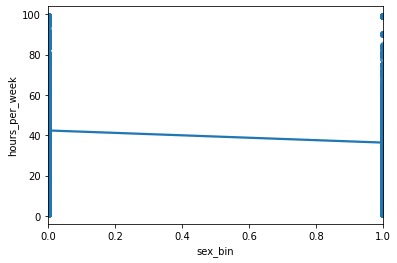

In [173]:
# 1a. fit a linear regrssion with hours_per_week as the dependent variable and sex as independent variable
sns.regplot(x='sex_bin', y='hours_per_week', data=income94)

Answer for 1a, men tend to work more hours, since we can see that the line hours_per_week decreases as sex_bin increases.

In [174]:
# 1b. OLS regression result after adding education_num as a control variable
reg7 = smf.ols('hours_per_week ~ sex_bin + education_num', data = income94).fit()
print(reg7.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        06:46:20   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        35.3815      0.271    130.613

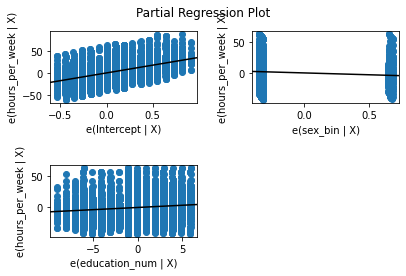

In [175]:
# the partial regression for two variables 
fig = sm.graphics.plot_partregress_grid(reg7)
fig.tight_layout(pad=2.0)

1b. Yes, the trend in hours worked by men vs women remain the same. Education_num is significant according to the OLS result (p is close to 0)

In [176]:
#1c. add a new column called gross_income_bin, and the value is according to it's gross_income_group.
# if the gross_income_group is <=50K, set value to 0, and if >50K, set value to 1
income94['gross_income_bin'] = (income94.gross_income_group == ' >50K').astype(int)
income94.gross_income_bin.value_counts()

0    24720
1     7841
Name: gross_income_bin, dtype: int64

In [177]:
# OLS regression result after adding gross_income_group as a control variable
reg8 = smf.ols('hours_per_week ~ sex_bin + education_num + gross_income_bin', data = income94).fit()
print(reg8.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        06:46:21   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           36.5228      0.271  

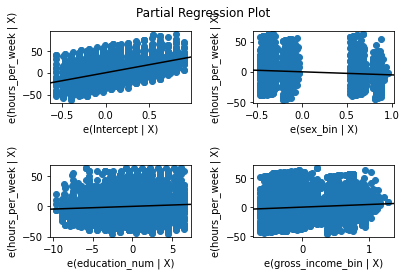

In [178]:
# the partial regression for three variables
fig = sm.graphics.plot_partregress_grid(reg8)
fig.tight_layout(pad=2.0)

1c. I choose R-squared to decide which model is best. The model with 3 variables is best since it has highest R-squared. I can use Hierarchical model fitting procedure to redo it. I can divide the data into many smaller dataset according to different sex(first level), education_num(second level), and gross_income_group(third level), then sampling each of small dataset.
